In [1]:
import os
import pickle
import datetime
import numpy as np
import array
import matplotlib.pyplot as plt
#import modape
from vam.whittaker import ws2d, ws2doptv, ws2doptvp
#from modape.utils import DateHelper, fromjulian

In [2]:
from osgeo import gdal
import os

In [3]:
path_dir = '/home/philipp/Desktop/time_series/georgia/modis_rest/raw/'
files = os.listdir(path_dir)

In [4]:
files

['MYD13Q1.A2015329.250m_16_days_NDVI.tif',
 'MOD13Q1.A2014321.250m_16_days_NDVI.tif',
 'MOD13Q1.A2013033.250m_16_days_NDVI.tif',
 'MOD13Q1.A2015081.250m_16_days_NDVI.tif',
 'MOD13Q1.A2019257.250m_16_days_NDVI.tif',
 'MYD13Q1.A2018345.250m_16_days_NDVI.tif',
 'MOD13Q1.A2019209.250m_16_days_NDVI.tif',
 'MYD13Q1.A2020121.250m_16_days_NDVI.tif',
 'MYD13Q1.A2014057.250m_16_days_NDVI.tif',
 'MOD13Q1.A2016081.250m_16_days_NDVI.tif',
 'MYD13Q1.A2013153.250m_16_days_NDVI.tif',
 'MOD13Q1.A2020129.250m_16_days_NDVI.tif',
 'MOD13Q1.A2014209.250m_16_days_NDVI.tif',
 'MYD13Q1.A2016057.250m_16_days_NDVI.tif',
 'MOD13Q1.A2015033.250m_16_days_NDVI.tif',
 'MOD13Q1.A2013257.250m_16_days_NDVI.tif',
 'MYD13Q1.A2018025.250m_16_days_NDVI.tif',
 'MYD13Q1.A2019153.250m_16_days_NDVI.tif',
 'MOD13Q1.A2012145.250m_16_days_NDVI.tif',
 'MYD13Q1.A2017265.250m_16_days_NDVI.tif',
 'MYD13Q1.A2016297.250m_16_days_NDVI.tif',
 'MYD13Q1.A2016025.250m_16_days_NDVI.tif',
 'MYD13Q1.A2013169.250m_16_days_NDVI.tif',
 'MOD13Q1.A

In [5]:
def tif2array(file_path, dtype=np.uint8):
    """
    read GeoTiff and convert to numpy.ndarray.
    inputs:
        file_path (str) : file path of the input GeoTiff file
    return:
        image(np.array) : image for each bands
        dataset : for gdal's data drive
    """
    dataset = gdal.Open(file_path, gdal.GA_ReadOnly)

    if dataset is None:
        return None

    # Allocate our array using the first band's datatype
    image_datatype = dataset.GetRasterBand(1).DataType
    image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                     dtype=dtype)

    # Loop over all bands in dataset
    for b in range(dataset.RasterCount):
        # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
        band = dataset.GetRasterBand(b + 1)
        # Read in the band's data into the third dimension of our array
        image[:, :, b] = band.ReadAsArray()#buf_type=gdalconst.GDT_Byte)

    #image = image[2:-2,2:-2,:]

    return image

In [6]:
files[0][-8:] == 'NDVI.tif'

True

In [7]:
name_ndvi=[]
for n in files:
    if n[-8:] == 'NDVI.tif':
        name_ndvi.append(n)
        
ndvi = np.array(sorted(name_ndvi))

In [8]:
ndvi

array(['MOD13Q1.A2012001.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012017.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012033.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012049.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012065.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012081.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012097.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012113.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012129.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012145.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012161.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012177.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012193.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012209.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012225.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012241.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012257.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012273.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012289.250m_16_days_NDVI.tif',
       'MOD13Q1.A2012305.250m_16_days_NDVI.tif',
       'MOD13Q1.A201

In [9]:
len(ndvi)

414

In [11]:
imgs = []

for i in ndvi[0:len(ndvi)]:
    
    imgs.append(tif2array(path_dir + i, dtype=np.int16))

In [12]:
images = np.concatenate(imgs, axis=2)

In [13]:
del imgs

In [14]:
images.shape

(1252, 1826, 414)

In [15]:
np.arange(2012, 2021).size

9

In [16]:
images

array([[[ 5515,  1856,  2179, ...,  6442,  5389,  5471],
        [ 5515,  1739,  2179, ...,  6594,  5661,  5471],
        [ 5032,  1739,  1859, ...,  6680,  5661,  5813],
        ...,
        [ 3814,   238,    20, ...,  2940,  3036,  3462],
        [ 3942,   342,   -13, ...,  2986,  3228,  2840],
        [ 3739,   365,   -13, ...,  3355,  3366,  2970]],

       [[ 5656,  1856,  1684, ...,  6442,  5362,  5436],
        [ 5928,  1857,  2573, ...,  6513,  5615,  5443],
        [ 5928,  1675,  2298, ...,  6513,  5615,  5657],
        ...,
        [ 4090,   249,    25, ...,  2770,  3099,  3166],
        [ 4090,   271,     0, ...,  2577,  2999,  2840],
        [ 3739,   297,   -32, ...,  3120,  3287,  4018]],

       [[ 5862,  2026,  1660, ...,  6546,  5147,  5443],
        [ 5656,  2074,  2672, ...,  6978,  5446,  5340],
        [ 5928,  2074,  2565, ...,  6734,  5422,  5379],
        ...,
        [ 3684,   249,   -14, ...,  2810,  2999,  3214],
        [ 4035,   291,    -5, ...,  2867,  39

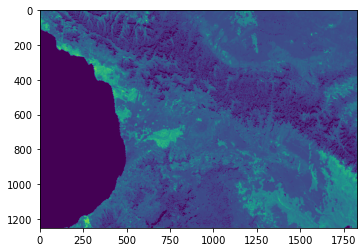

In [17]:
plt.imshow(images[:,:,1])

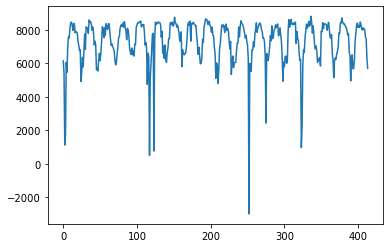

In [18]:
plt.plot(images[288,288])

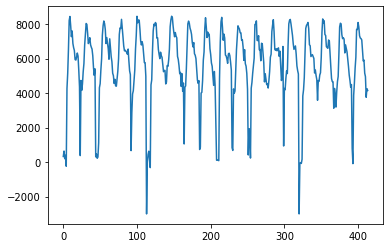

In [264]:
plt.plot(images[700,1010])

In [265]:
a = images[700,1010].copy()

In [266]:
a[a<0] = -3000

In [267]:
a = a/10000

In [268]:
idx_src = np.arange(1, 365, 16)
idx_targ = np.arange(1, 365, 1)

In [104]:
# print a year
print(np.arange(1, 365, 16))
print(np.arange(9, 365, 16))

[  1  17  33  49  65  81  97 113 129 145 161 177 193 209 225 241 257 273
 289 305 321 337 353]
[  9  25  41  57  73  89 105 121 137 153 169 185 201 217 233 249 265 281
 297 313 329 345 361]


In [270]:
idx_list = []
temp = 1
for i in range(1,10):
    
    print(2011+i)
    
    idx_src = np.arange(temp, 365*i, 16)
    idx_list.append(idx_src)
    print(idx_src)
    
    temp = temp + 365
    
temp = 9
for i in range(1,10):
    
    print(2011+i)
    
    idx_src = np.arange(temp, 365*i, 16)
    idx_list.append(idx_src)
    print(idx_src)
    
    temp = temp + 365
    
idx_src = np.concatenate(idx_list)
del idx_list

2012
[  1  17  33  49  65  81  97 113 129 145 161 177 193 209 225 241 257 273
 289 305 321 337 353]
2013
[366 382 398 414 430 446 462 478 494 510 526 542 558 574 590 606 622 638
 654 670 686 702 718]
2014
[ 731  747  763  779  795  811  827  843  859  875  891  907  923  939
  955  971  987 1003 1019 1035 1051 1067 1083]
2015
[1096 1112 1128 1144 1160 1176 1192 1208 1224 1240 1256 1272 1288 1304
 1320 1336 1352 1368 1384 1400 1416 1432 1448]
2016
[1461 1477 1493 1509 1525 1541 1557 1573 1589 1605 1621 1637 1653 1669
 1685 1701 1717 1733 1749 1765 1781 1797 1813]
2017
[1826 1842 1858 1874 1890 1906 1922 1938 1954 1970 1986 2002 2018 2034
 2050 2066 2082 2098 2114 2130 2146 2162 2178]
2018
[2191 2207 2223 2239 2255 2271 2287 2303 2319 2335 2351 2367 2383 2399
 2415 2431 2447 2463 2479 2495 2511 2527 2543]
2019
[2556 2572 2588 2604 2620 2636 2652 2668 2684 2700 2716 2732 2748 2764
 2780 2796 2812 2828 2844 2860 2876 2892 2908]
2020
[2921 2937 2953 2969 2985 3001 3017 3033 3049 3065 3081 3

In [271]:
idx_src

array([   1,   17,   33,   49,   65,   81,   97,  113,  129,  145,  161,
        177,  193,  209,  225,  241,  257,  273,  289,  305,  321,  337,
        353,  366,  382,  398,  414,  430,  446,  462,  478,  494,  510,
        526,  542,  558,  574,  590,  606,  622,  638,  654,  670,  686,
        702,  718,  731,  747,  763,  779,  795,  811,  827,  843,  859,
        875,  891,  907,  923,  939,  955,  971,  987, 1003, 1019, 1035,
       1051, 1067, 1083, 1096, 1112, 1128, 1144, 1160, 1176, 1192, 1208,
       1224, 1240, 1256, 1272, 1288, 1304, 1320, 1336, 1352, 1368, 1384,
       1400, 1416, 1432, 1448, 1461, 1477, 1493, 1509, 1525, 1541, 1557,
       1573, 1589, 1605, 1621, 1637, 1653, 1669, 1685, 1701, 1717, 1733,
       1749, 1765, 1781, 1797, 1813, 1826, 1842, 1858, 1874, 1890, 1906,
       1922, 1938, 1954, 1970, 1986, 2002, 2018, 2034, 2050, 2066, 2082,
       2098, 2114, 2130, 2146, 2162, 2178, 2191, 2207, 2223, 2239, 2255,
       2271, 2287, 2303, 2319, 2335, 2351, 2367, 23

In [272]:
whoe_year = np.ones(365*9)*-0.3

whoe_year[idx_src-1] = a

whoe_year

array([ 0.0327, -0.3   , -0.3   , ..., -0.3   , -0.3   , -0.3   ])

In [273]:
# create weights
w = np.array((whoe_year!=-0.3)*1,dtype='double')

# apply filter
z = ws2d(whoe_year,5000,w)

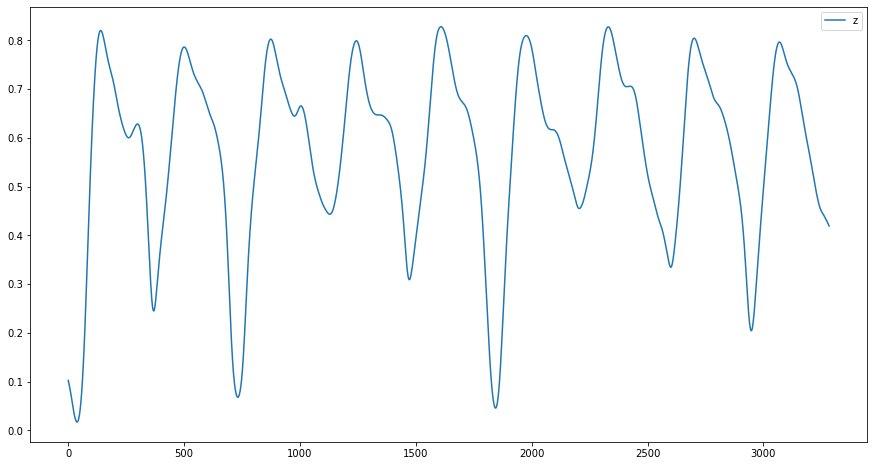

In [274]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(z, label='z')
ax.legend()

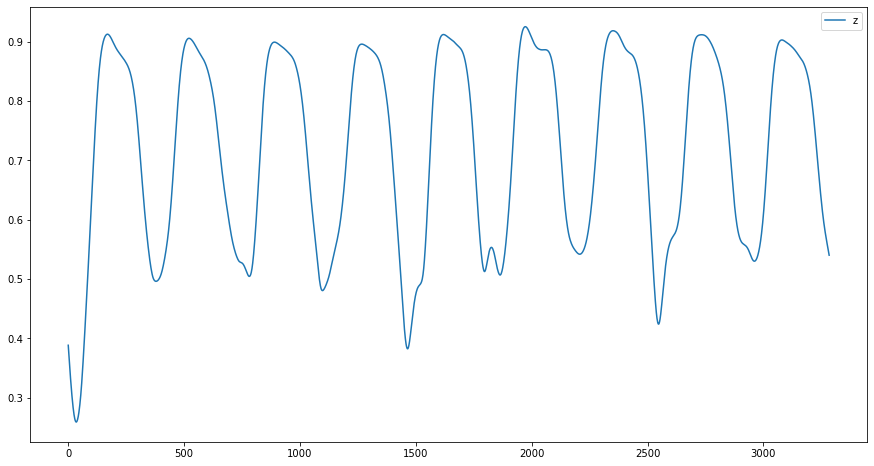

In [120]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(z, label='z')
ax.legend()

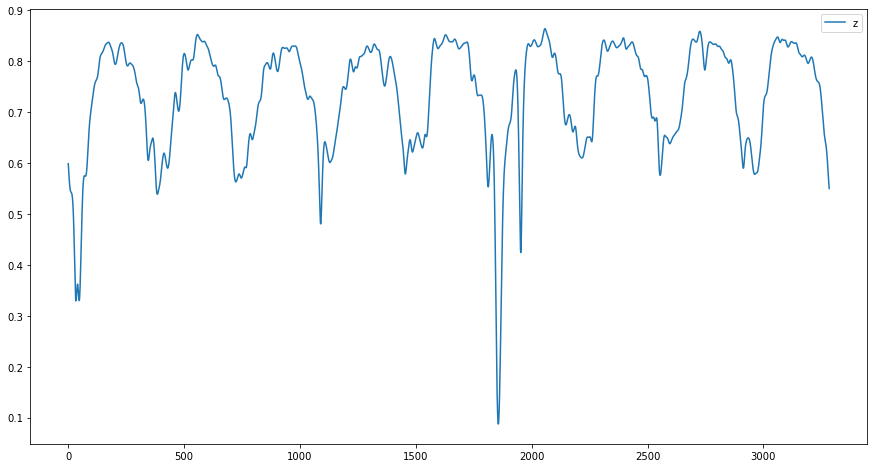

In [80]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(z, label='z')
ax.legend()

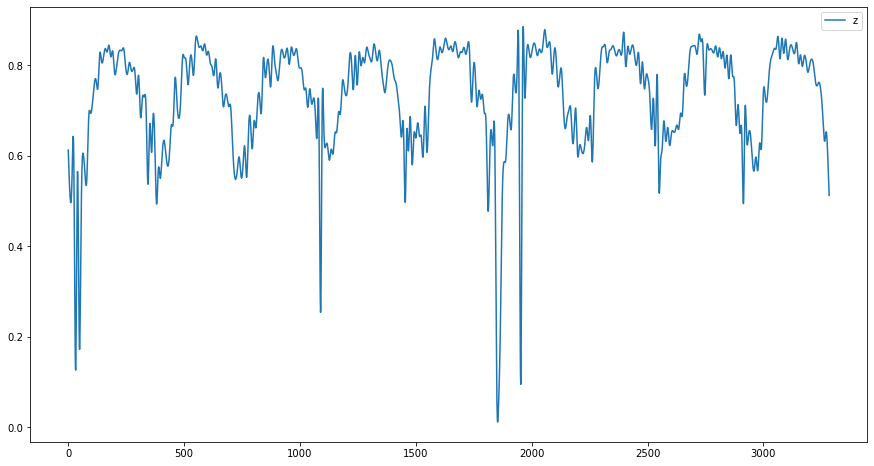

In [77]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(z, label='z')
ax.legend()

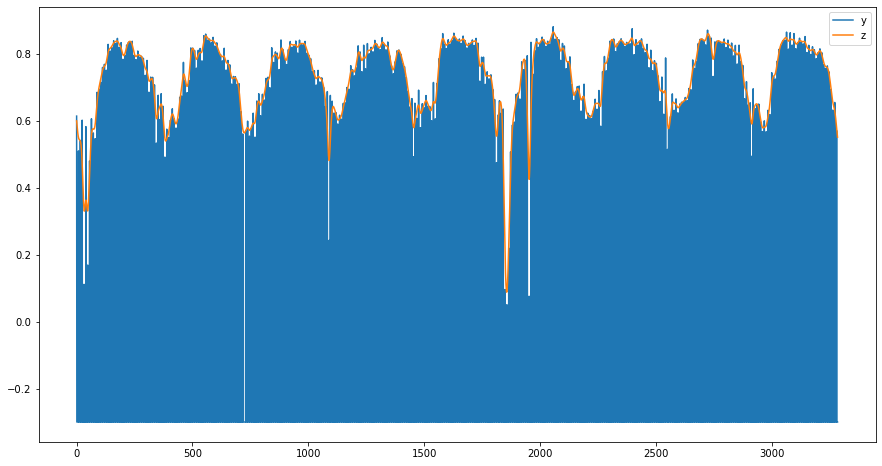

In [71]:
#whoe_year[whoe_year==-0.3] = 0.4

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(whoe_year, label='y')
ax.plot(z, label='z')
ax.legend()

In [37]:
a.mean()

0.7303410628019323

In [111]:
np.quantile(a, np.arange(0,1.1,0.1))

array([0.0501 , 0.59893, 0.63486, 0.67985, 0.72412, 0.75955, 0.7935 ,
       0.81688, 0.83042, 0.8412 , 0.8801 ])

In [91]:
a.mean()

0.7126845

In [92]:
np.quantile(a, np.arange(0,1.1,0.1))

array([0.0306 , 0.51816, 0.55536, 0.58651, 0.63536, 0.75765, 0.85436,
       0.87267, 0.887  , 0.90187, 0.9384 ])

In [74]:
a.mean() - np.std(a)

0.2448259779180505

In [23]:
z[100]

0.5791546179866573

In [24]:
w[100]

1.0

In [28]:
w.shape

(400,)

In [35]:
z_arr = np.array(z)

In [37]:
z_arr[2:25]

array([0.32339611, 0.2421756 , 0.17858804, 0.15130047, 0.16636109,
       0.23084808, 0.34100349, 0.48612458, 0.62586825, 0.74310894,
       0.83151427, 0.89015097, 0.92137434, 0.93201457, 0.92726443,
       0.91199524, 0.88589185, 0.84533961, 0.78462467, 0.70093925,
       0.59964306, 0.49612191, 0.3933973 ])

In [ ]:
z_arr

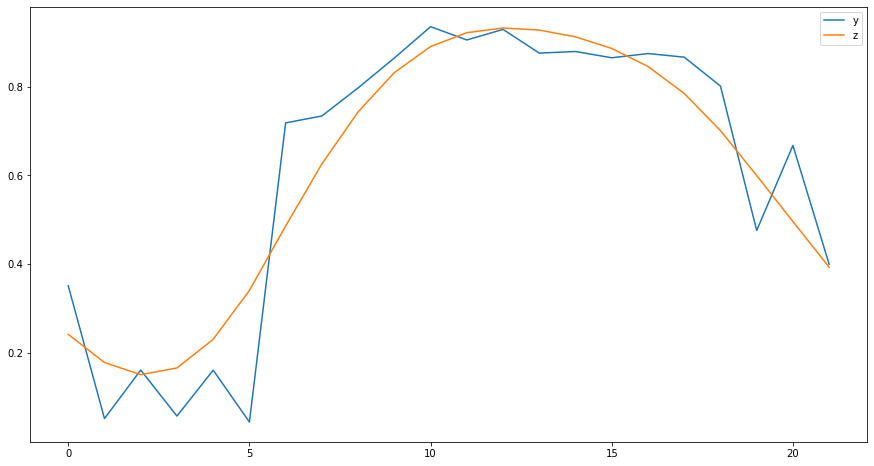

In [43]:
a[a==-0.3] = 0.4

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(a[3:25], label='y')
ax.plot(z[3:25], label='z')
ax.legend()

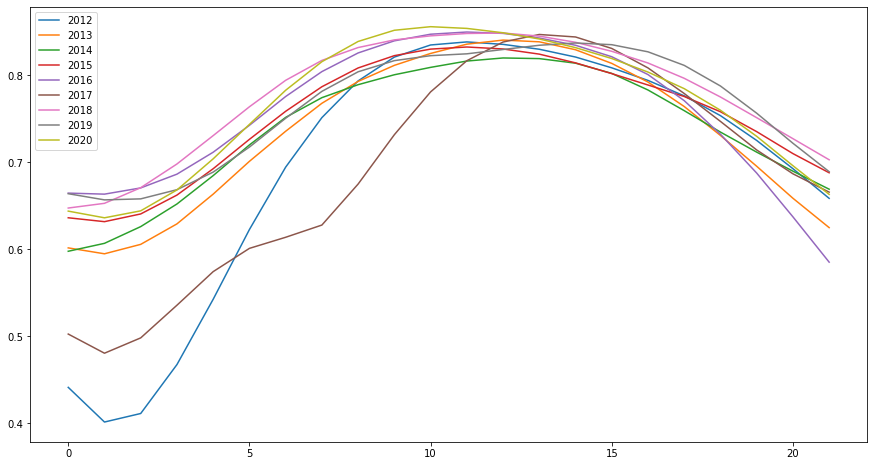

In [112]:
x = 3
y = 23

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(z[x+1:x+y], label='2012')
ax.plot(z[x+y*1+1:x+y*2], label='2013')
ax.plot(z[x+y*2+1:x+y*3], label='2014')
ax.plot(z[x+y*3+1:x+y*4], label='2015')
ax.plot(z[x+y*4+1:x+y*5], label='2016')
ax.plot(z[x+y*5+1:x+y*6], label='2017')
ax.plot(z[x+y*6+1:x+y*7], label='2018')
ax.plot(z[x+y*7+1:x+y*8], label='2019')
ax.plot(z[x+y*8+1:x+y*9], label='2020')
ax.legend()

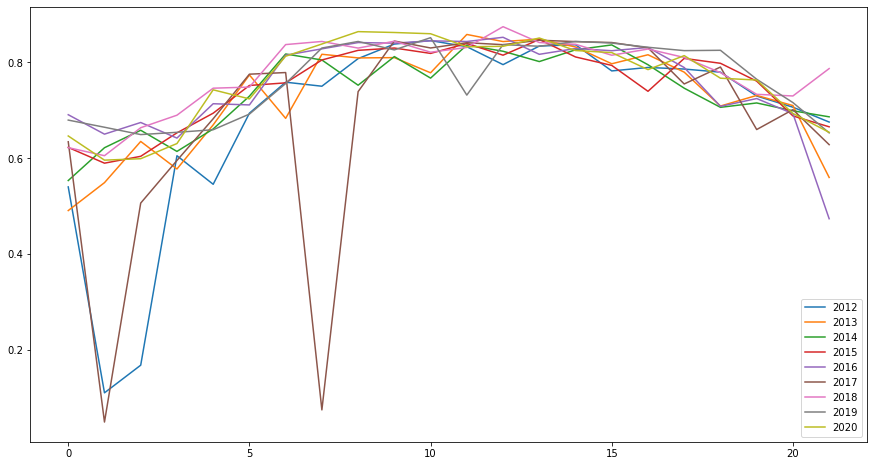

In [113]:
x = 3
y = 23

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(a[x+1:x+y], label='2012')
ax.plot(a[x+y*1+1:x+y*2], label='2013')
ax.plot(a[x+y*2+1:x+y*3], label='2014')
ax.plot(a[x+y*3+1:x+y*4], label='2015')
ax.plot(a[x+y*4+1:x+y*5], label='2016')
ax.plot(a[x+y*5+1:x+y*6], label='2017')
ax.plot(a[x+y*6+1:x+y*7], label='2018')
ax.plot(a[x+y*7+1:x+y*8], label='2019')
ax.plot(a[x+y*8+1:x+y*9], label='2020')
ax.legend()

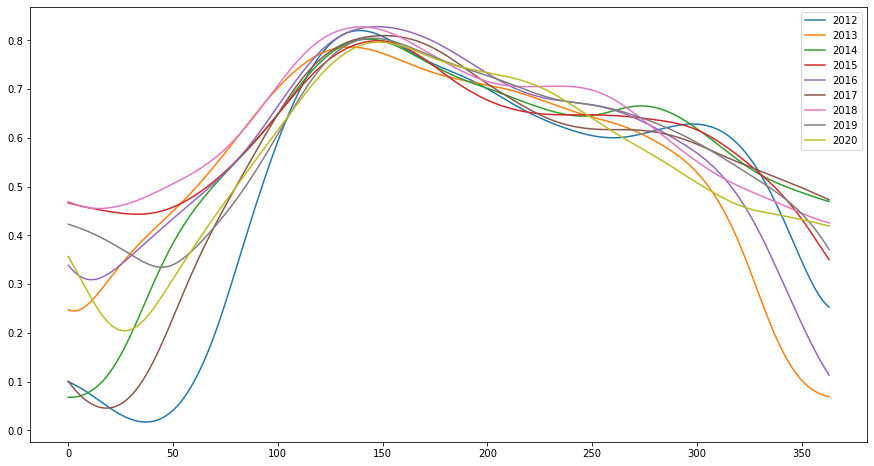

In [292]:
x = 0
y = 365

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(z[x+1:x+y], label='2012')
ax.plot(z[x+y*1+1:x+y*2], label='2013')
ax.plot(z[x+y*2+1:x+y*3], label='2014')
ax.plot(z[x+y*3+1:x+y*4], label='2015')
ax.plot(z[x+y*4+1:x+y*5], label='2016')
ax.plot(z[x+y*5+1:x+y*6], label='2017')
ax.plot(z[x+y*6+1:x+y*7], label='2018')
ax.plot(z[x+y*7+1:x+y*8], label='2019')
ax.plot(z[x+y*8+1:x+y*9], label='2020')
ax.legend()

In [289]:
#x = np.linspace(0,10,1000)
#dx = x[1]-x[0]
#y = x**2 + 1
dydx = np.gradient(z, 1)

dydx2 = np.gradient(dydx, 1)

# create weights
w = np.array((dydx2!=-0.3)*1,dtype='double')
# apply filter
dydx2_s = ws2d(dydx2,100000,w)

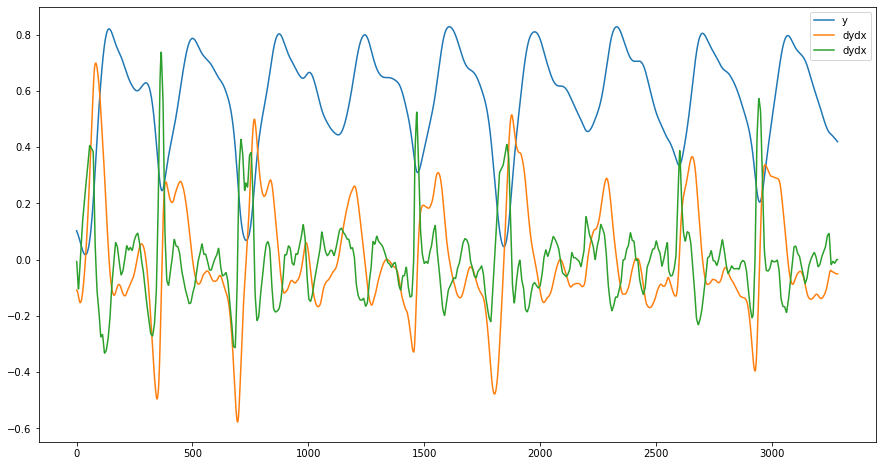

In [290]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(z, label='y')
ax.plot(np.array(dydx)*50, label='dydx')
ax.plot(np.array(dydx2)*1000, label='dydx')
ax.legend()

In [211]:
# create weights
w = np.array((dydx2!=-0.3)*1,dtype='double')

# apply filter
deriv = ws2d(dydx2,100,w)

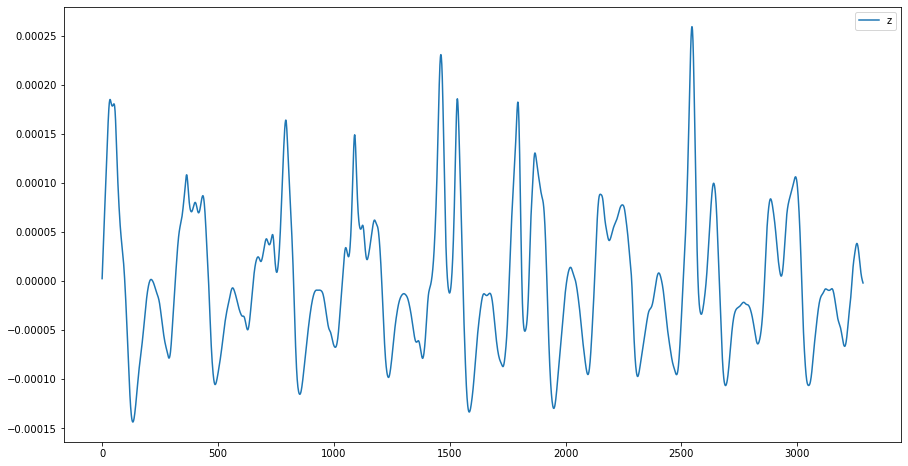

In [212]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(deriv, label='z')
ax.legend()

In [175]:
31+28+31+30+31+30+31+31+30+31+30+31

365

In [160]:
np.arange(0,31)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [165]:
np.arange(31,59)

array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])

In [179]:
month_idx = [np.arange(0,31), np.arange(31,59), np.arange(59,90), np.arange(90,120),\
 np.arange(120,151), np.arange(151,181), np.arange(181,212), np.arange(212,243),\
 np.arange(243,273), np.arange(273,304), np.arange(304,334), np.arange(334,365)]

In [198]:
np.arange(0,365)+365*2

array([ 730,  731,  732,  733,  734,  735,  736,  737,  738,  739,  740,
        741,  742,  743,  744,  745,  746,  747,  748,  749,  750,  751,
        752,  753,  754,  755,  756,  757,  758,  759,  760,  761,  762,
        763,  764,  765,  766,  767,  768,  769,  770,  771,  772,  773,
        774,  775,  776,  777,  778,  779,  780,  781,  782,  783,  784,
        785,  786,  787,  788,  789,  790,  791,  792,  793,  794,  795,
        796,  797,  798,  799,  800,  801,  802,  803,  804,  805,  806,
        807,  808,  809,  810,  811,  812,  813,  814,  815,  816,  817,
        818,  819,  820,  821,  822,  823,  824,  825,  826,  827,  828,
        829,  830,  831,  832,  833,  834,  835,  836,  837,  838,  839,
        840,  841,  842,  843,  844,  845,  846,  847,  848,  849,  850,
        851,  852,  853,  854,  855,  856,  857,  858,  859,  860,  861,
        862,  863,  864,  865,  866,  867,  868,  869,  870,  871,  872,
        873,  874,  875,  876,  877,  878,  879,  8

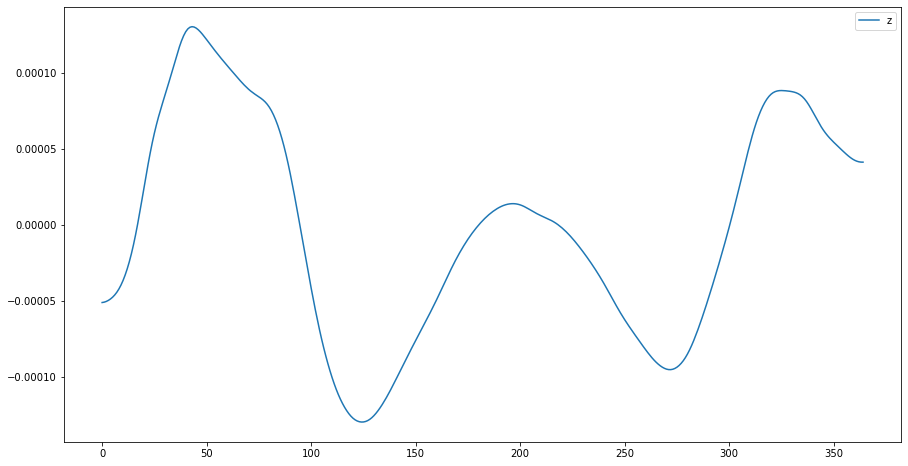

In [223]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(np.array(deriv)[np.arange(0,365)+365*5], label='z')
ax.legend()

In [222]:
np.argmax(np.array(deriv)[np.arange(50,120)+365*5])+50

50

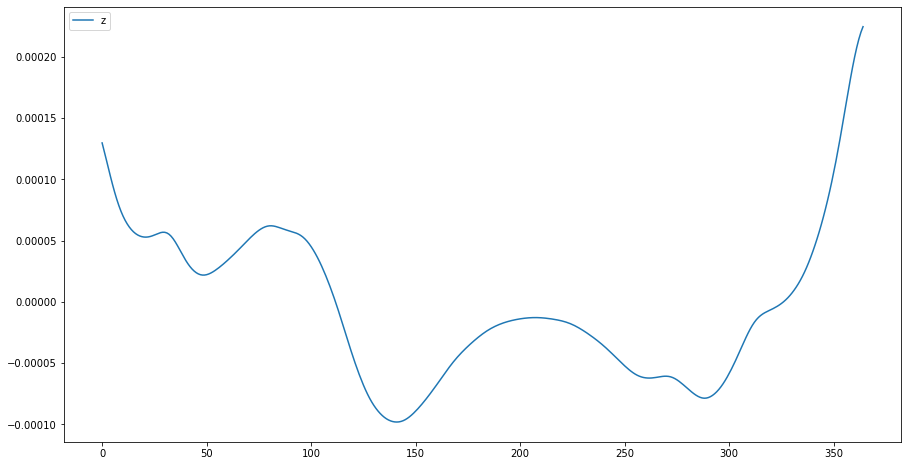

In [218]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(np.array(deriv)[np.arange(0,365)+365*3], label='z')
ax.legend()

In [194]:
np.array(deriv)[month_idx[2]+365*2]

array([1.52097362e-04, 1.53973270e-04, 1.55272229e-04, 1.55971680e-04,
       1.56057140e-04, 1.55524929e-04, 1.54385510e-04, 1.52665098e-04,
       1.50403189e-04, 1.47648324e-04, 1.44454391e-04, 1.40877427e-04,
       1.36972848e-04, 1.32793074e-04, 1.28385475e-04, 1.23790986e-04,
       1.19043746e-04, 1.14171320e-04, 1.09195063e-04, 1.04130625e-04,
       9.89885460e-05, 9.37749488e-05, 8.84923037e-05, 8.31401107e-05,
       7.77153378e-05, 7.22127721e-05, 6.66254439e-05, 6.09451285e-05,
       5.51629323e-05, 4.92699726e-05, 4.32581587e-05])